In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import LSTM, Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from scipy import sparse
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from tcn import TCN, tcn_full_summary

from model.data_parser import convert_jaad_dict_to_df, get_JAAD_data

In [2]:
#Load data
data_dir = "C:/Users/max00/Documents/PoseRecognition/pedestrian-pose-recognition/data/JAAD_JSON_Labels/"

X, Y = convert_jaad_dict_to_df(get_JAAD_data(data_dir))

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
sp_X_train = sparse.lil_matrix(X_train.values)
sp_Y_train = sparse.lil_matrix(Y_train.values)
sp_X_test = sparse.csr_matrix(X_test.values)
sp_Y_test = sparse.csr_matrix(Y_test.values)

Starting to read JAAD json files!


# Random forest

In [13]:
classifier = ClassifierChain(
        classifier=RandomForestClassifier(n_estimators=100),
        require_dense=[False, True]
    )

classifier.fit(sp_X_train, sp_Y_train)
# predict
predictions = classifier.predict(sp_X_test)

print(metrics.hamming_loss(sp_Y_test, predictions))
print(metrics.accuracy_score(sp_Y_test, predictions))

0.04928611760909898
0.8362507058159232


In [16]:
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test)
df = pd.DataFrame.sparse.from_spmatrix(predictions)

0.04839880616278132
0.8384286520932483


TypeError: len() of unsized object

In [28]:
print(metrics.hamming_loss(Y_test, df))
print(metrics.accuracy_score(Y_test, df))
i=0
for col in df:
    df = df.rename(columns={col: str(int(col))})
for col in Y_test.columns:
    print(col + " accury:")
    print(metrics.accuracy_score(Y_test[col], df[str(i)]) )
    i += 1

0.04839880616278132
0.8384286520932483
look accury:
0.9244171977091232
action accury:
0.9409534564814068
cross accury:
0.8945712672420747
hand_gesture accury:
0.9983867064612406
nod accury:
0.9996773412922482


# BinaryRelevance

In [ ]:
clf = BinaryRelevance(
        classifier=SVC(),
        require_dense=[False, True]
    )

clf.fit(sp_X_train, sp_Y_train)
prediction = clf.predict(sp_X_test)


print(metrics.hamming_loss(sp_Y_test, prediction))
print(metrics.accuracy_score(sp_Y_test, prediction))

# LSTM

In [3]:
features, coordinate_values = X_train.shape
model = Sequential()
model.add(LSTM(64, input_shape=(coordinate_values, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='sigmoid'))  # output layer，units is the unit number for output

# compile model
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy,
                  metrics=[tf.keras.metrics.F1Score(
                      average='weighted', threshold=0.6, name='f1_score', dtype=None)])

model.fit(X_train, Y_train, epochs=11, batch_size=32)

# prediction
predictions = model.predict(X_test)

results = model.evaluate(X_test, Y_test, batch_size=128)
print(dict(zip(model.metrics_names, results)))

Epoch 1/11
1356/1356 [==============================] - 24s 16ms/step - loss: 0.2466 - f1_score: 0.7371
Epoch 2/11
1356/1356 [==============================] - 22s 16ms/step - loss: 0.2378 - f1_score: 0.7423
Epoch 3/11
1356/1356 [==============================] - 22s 16ms/step - loss: 0.2271 - f1_score: 0.7431
Epoch 4/11
1356/1356 [==============================] - 22s 16ms/step - loss: 0.2222 - f1_score: 0.7443
Epoch 5/11
1356/1356 [==============================] - 22s 16ms/step - loss: 0.2193 - f1_score: 0.7466
Epoch 6/11
1356/1356 [==============================] - 22s 16ms/step - loss: 0.2164 - f1_score: 0.7521
Epoch 7/11
1356/1356 [==============================] - 22s 16ms/step - loss: 0.2143 - f1_score: 0.7536
Epoch 8/11
1356/1356 [==============================] - 22s 16ms/step - loss: 0.2130 - f1_score: 0.7555
Epoch 9/11
1356/1356 [==============================] - 22s 16ms/step - loss: 0.2109 - f1_score: 0.7554
Epoch 10/11
1356/1356 [==============================] - 22s 16m

In [ ]:
i = 0
for col in Y_train.columns:

    pred = [1 if x >= 0.6 else 0 for x in (predictions[:, i])]
    cm = confusion_matrix((Y_test.to_numpy())[:, i], pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(col + ' lstm')
    plt.show()
    i += 1

In [9]:
features, coordinate_values = X_train.shape
model = Sequential()
model.add(LSTM(64, input_shape=(coordinate_values, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='sigmoid'))  # output layer，units is the unit number for output

# compile model
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy,
                  metrics=[tf.keras.metrics.F1Score(
                      average='weighted', threshold=0.5, name='f1_score', dtype=None)])

model.fit(X_train, Y_train, epochs=11, batch_size=32)

# prediction
predictions = model.predict(X_test)

results = model.evaluate(X_test, Y_test, batch_size=128)
print(dict(zip(model.metrics_names, results)))

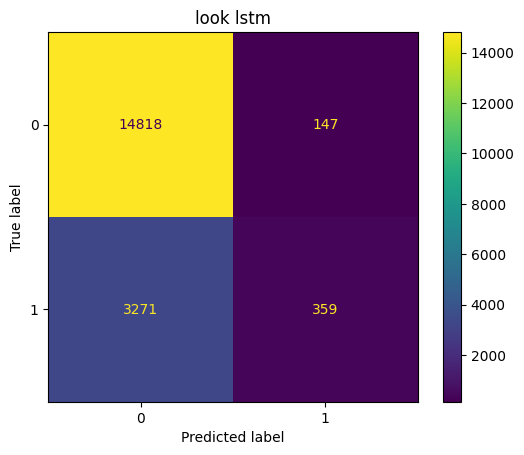

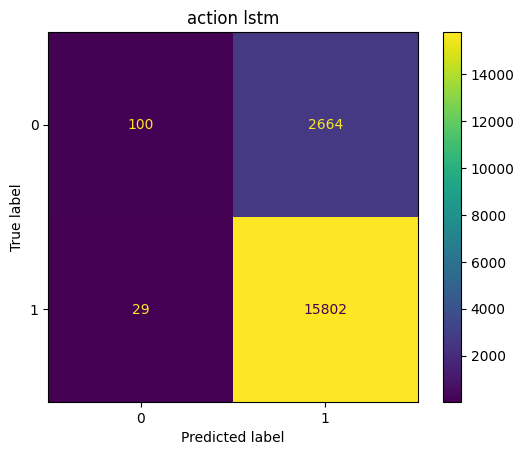

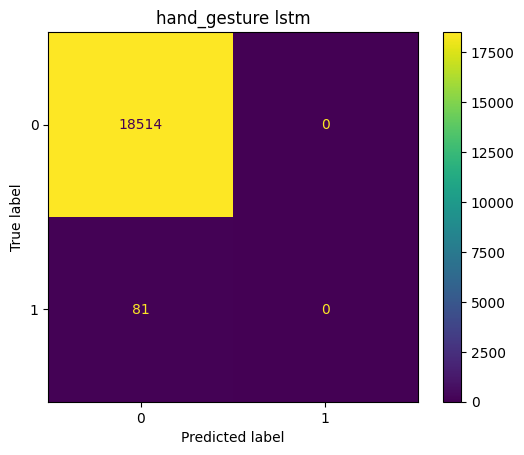

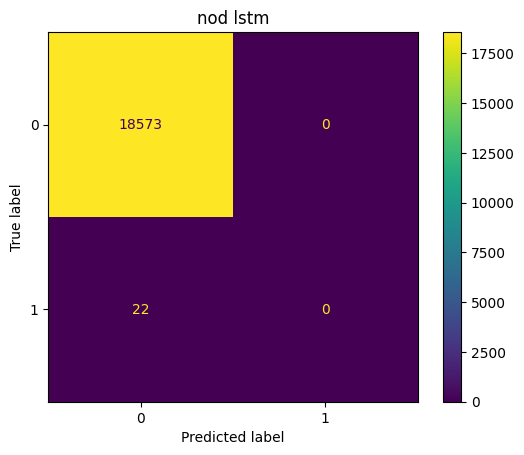

In [6]:
i = 0
for col in Y_train.columns:

    pred = [1 if x >= 0.5 else 0 for x in (predictions[:, i])]
    cm = confusion_matrix((Y_test.to_numpy())[:, i], pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(col + ' lstm')
    plt.show()
    i += 1

# TCN

In [3]:
features, coordinate_values = X_train.shape
batch_size, time_steps, input_dim = None, 20, coordinate_values
tcn_layer = TCN(input_shape=(coordinate_values, 1))
# The receptive field tells you how far the model can see in terms of timesteps.
print('Receptive field size =', tcn_layer.receptive_field)

m = Sequential([
        tcn_layer,
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(4, activation='sigmoid')
    ])

m.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=[tf.keras.metrics.F1Score(
        average='weighted', threshold=0.6, name='f1_score', dtype=None)])

tcn_full_summary(m, expand_residual_blocks=False)

m.fit(X_train, Y_train, epochs=8, steps_per_epoch=1000)
predictions = m.predict(X_test)
print("Complete")
results = m.evaluate(X_test, Y_test, batch_size=32)
print(dict(zip(m.metrics_names, results)))

Receptive field size = 253
Use tensorboard instead. Example in keras-tcn/tasks/tcn_tensorboard.py.
Epoch 1/8
1000/1000 [==============================] - 70s 67ms/step - loss: 0.2178 - f1_score: 0.7463
Epoch 2/8
1000/1000 [==============================] - 67s 67ms/step - loss: 0.2034 - f1_score: 0.7647
Epoch 3/8
1000/1000 [==============================] - 68s 68ms/step - loss: 0.1962 - f1_score: 0.7710
Epoch 4/8
1000/1000 [==============================] - 69s 69ms/step - loss: 0.1891 - f1_score: 0.7827
Epoch 5/8
1000/1000 [==============================] - 71s 71ms/step - loss: 0.1826 - f1_score: 0.7918
Epoch 6/8
1000/1000 [==============================] - 72s 72ms/step - loss: 0.1765 - f1_score: 0.8025
Epoch 7/8
1000/1000 [==============================] - 71s 71ms/step - loss: 0.1694 - f1_score: 0.8118
Epoch 8/8
582/582 [==============================] - 10s 16ms/step
Complete
582/582 [==============================] - 10s 16ms/step - loss: 0.1694 - f1_score: 0.8113
{'loss': 0.16

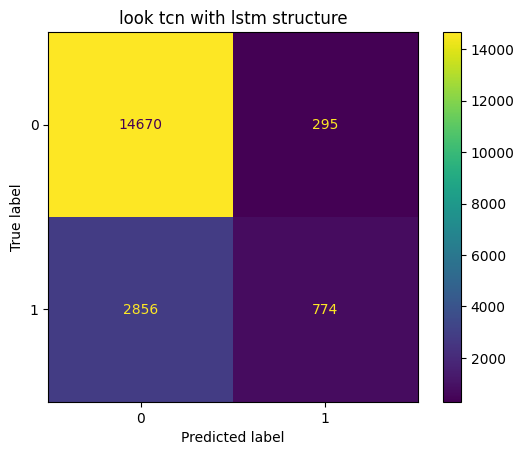

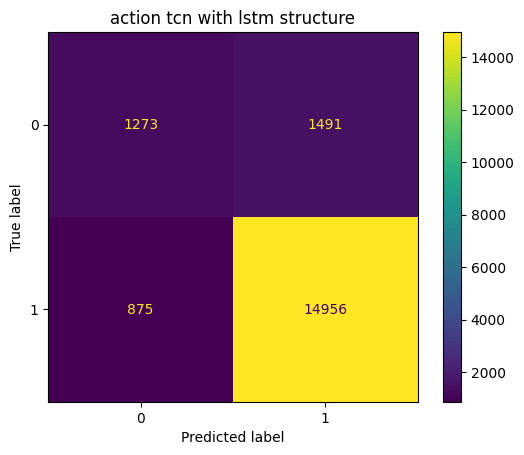

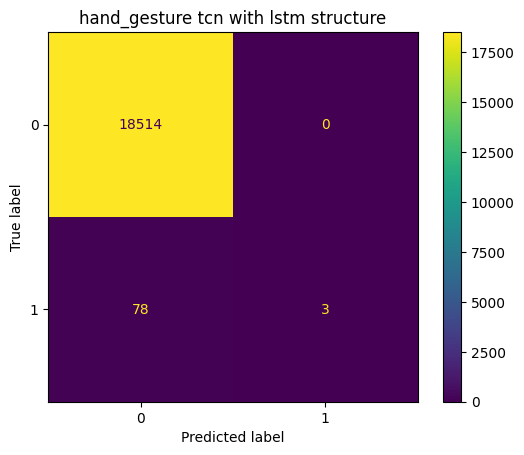

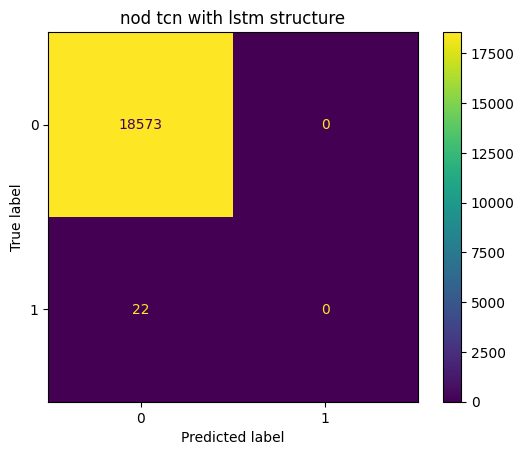

In [4]:
i = 0
for col in Y_train.columns:

    pred = [1 if x >= 0.6 else 0 for x in (predictions[:, i])]
    cm = confusion_matrix((Y_test.to_numpy())[:, i], pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(col + ' tcn with lstm structure')
    plt.show()
    i += 1

In [5]:
features, coordinate_values = X_train.shape
batch_size, time_steps, input_dim = None, 20, coordinate_values
tcn_layer = TCN(input_shape=(coordinate_values, 1))
# The receptive field tells you how far the model can see in terms of timesteps.
print('Receptive field size =', tcn_layer.receptive_field)

m = Sequential([
        tcn_layer,
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(4, activation='sigmoid')
    ])

m.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=[tf.keras.metrics.F1Score(
        average='weighted', threshold=0.5, name='f1_score', dtype=None)])

tcn_full_summary(m, expand_residual_blocks=False)

m.fit(X_train, Y_train, epochs=8, steps_per_epoch=1000)
predictions = m.predict(X_test)
print("Complete")
results = m.evaluate(X_test, Y_test, batch_size=32)
print(dict(zip(m.metrics_names, results)))

Receptive field size = 253
Use tensorboard instead. Example in keras-tcn/tasks/tcn_tensorboard.py.
Epoch 1/8
1000/1000 [==============================] - 72s 69ms/step - loss: 0.2177 - f1_score: 0.7607
Epoch 2/8
1000/1000 [==============================] - 70s 70ms/step - loss: 0.2029 - f1_score: 0.7810
Epoch 3/8
1000/1000 [==============================] - 73s 73ms/step - loss: 0.1946 - f1_score: 0.7913
Epoch 4/8
1000/1000 [==============================] - 76s 76ms/step - loss: 0.1886 - f1_score: 0.8002
Epoch 5/8
1000/1000 [==============================] - 74s 74ms/step - loss: 0.1814 - f1_score: 0.8093
Epoch 6/8
1000/1000 [==============================] - 73s 73ms/step - loss: 0.1758 - f1_score: 0.8173
Epoch 7/8
1000/1000 [==============================] - 73s 73ms/step - loss: 0.1695 - f1_score: 0.8270
Epoch 8/8
582/582 [==============================] - 10s 17ms/step
Complete
582/582 [==============================] - 11s 18ms/step - loss: 0.1674 - f1_score: 0.8373
{'loss': 0.16

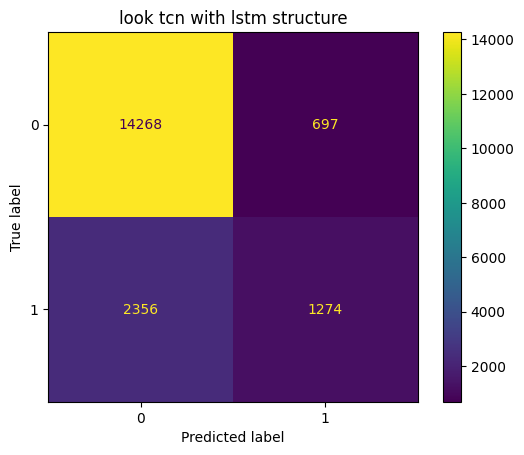

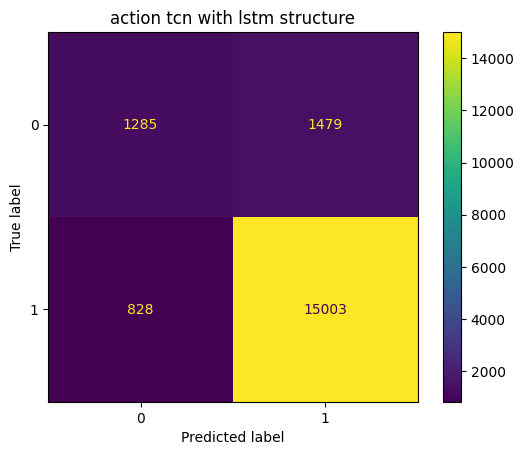

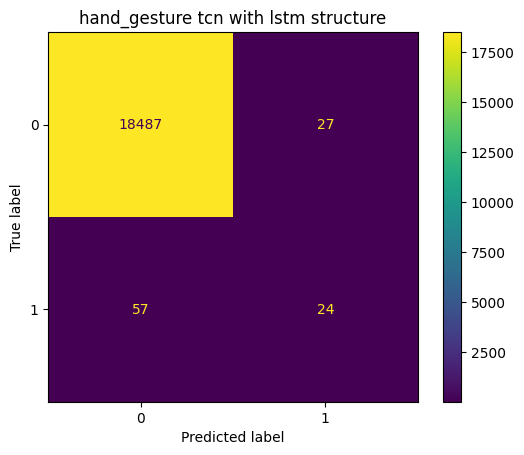

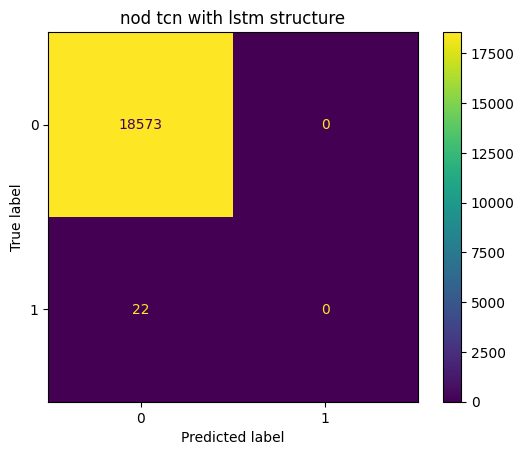

In [6]:
i = 0
for col in Y_train.columns:

    pred = [1 if x >= 0.5 else 0 for x in (predictions[:, i])]
    cm = confusion_matrix((Y_test.to_numpy())[:, i], pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(col + ' tcn with lstm structure')
    plt.show()
    i += 1

In [11]:
features, coordinate_values = X_train.shape
batch_size, time_steps, input_dim = None, 20, coordinate_values
tcn_layer = TCN(input_shape=(coordinate_values, 1))
# The receptive field tells you how far the model can see in terms of timesteps.
print('Receptive field size =', tcn_layer.receptive_field)

m = Sequential([
        tcn_layer,
        Dense(4, activation='sigmoid')
    ])

m.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=[tf.keras.metrics.F1Score(
        average='weighted', threshold=0.6, name='f1_score', dtype=None)])

tcn_full_summary(m, expand_residual_blocks=False)

history = m.fit(X_train, Y_train,  epochs=10, steps_per_epoch=1000)
predictions = m.predict(X_test)
print("Complete")
results = m.evaluate(X_test, Y_test, batch_size=32)
print(dict(zip(m.metrics_names, results)))

Receptive field size = 253
Use tensorboard instead. Example in keras-tcn/tasks/tcn_tensorboard.py.
Epoch 1/10
1000/1000 [==============================] - 78s 75ms/step - loss: 0.2182 - f1_score: 0.7538
Epoch 2/10
1000/1000 [==============================] - 77s 77ms/step - loss: 0.2019 - f1_score: 0.7657
Epoch 3/10
1000/1000 [==============================] - 84s 84ms/step - loss: 0.1950 - f1_score: 0.7716
Epoch 4/10
1000/1000 [==============================] - 85s 85ms/step - loss: 0.1876 - f1_score: 0.7810
Epoch 5/10
1000/1000 [==============================] - 79s 79ms/step - loss: 0.1813 - f1_score: 0.7927
Epoch 6/10
1000/1000 [==============================] - 79s 79ms/step - loss: 0.1750 - f1_score: 0.8021
Epoch 7/10
1000/1000 [==============================] - 79s 79ms/step - loss: 0.1683 - f1_score: 0.8131
Epoch 8/10
1000/1000 [==============================] - 81s 81ms/step - loss: 0.1620 - f1_score: 0.8231
Epoch 9/10
1000/1000 [==============================] - 81s 81ms/step

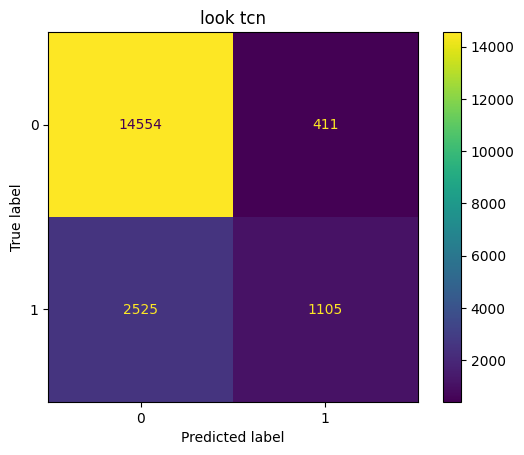

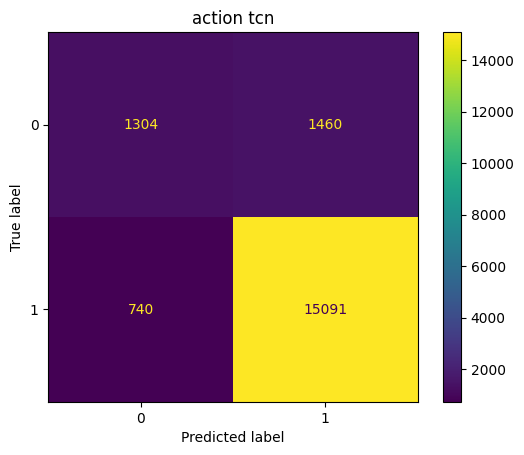

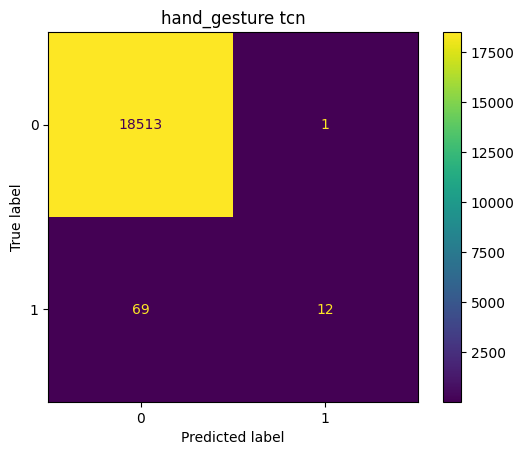

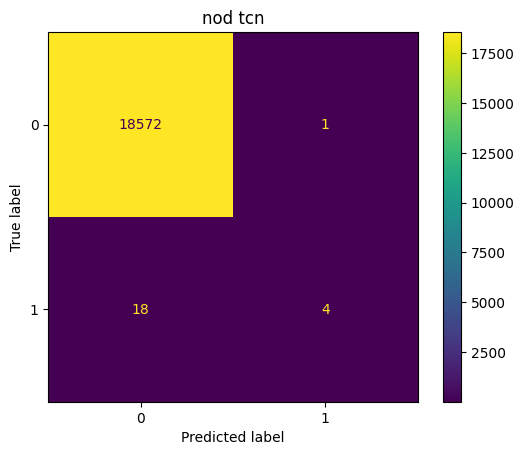

In [13]:
i = 0
for col in Y_train.columns:

    cm = confusion_matrix((Y_test.to_numpy())[:, i], np.round(predictions[:, i]))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(col + ' tcn')
    plt.show()
    i += 1